In [2]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline
import torch   
import torch.nn as nn
from utils.data_utils import getDataProviders
from utils.arg_extractor import get_args
from utils.experiment_builder import ExperimentBuilder
from utils.utils import load_net
import numpy as np
import pandas as pd

In [3]:
ls /Users/stathis/GoogleDrive/MLP/densenet121_cifar10/saved_models/train_model_best_readable

/Users/stathis/GoogleDrive/MLP/densenet121_cifar10/saved_models/train_model_best_readable


In [4]:
model_path = '/Users/stathis/GoogleDrive/MLP/densenet121_cifar10/saved_models/train_model_best_readable'
model_dict = torch.load(model_path, map_location='cpu')
net = load_net('densenet121', model_path, 10)

nets = {
#         'resnet56_cifar10': 'cifar10',
#         'resnet56_cifar10_fgsm': 'cifar10',
# #         'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
# #         'resnet56_cifar100_pgd': 'cifar100',
# #         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
#         'densenet121_cifar10_fgsm': 'cifar10',
# #         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
# #         'densenet121_cifar100_pgd': 'cifar100'
          'transfer_densenet121_nat_nat':'cifar10', 
#            'transfer_resnet56_nat_nat': 'cifar10',

}


models = {}
for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    architecture= net.split('_')[0]
    if architecture == 'transfer':
        architecture = net.split('_')[1]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    models[net] = load_network  

# train_summary = {}
# validation_summary = {}
# test_summary = {}

# models = {}
# for net,dataset in nets.items():
#     stats_path =  '../experiments_results/'+net+'/result_outputs'
    
#     data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
#     train_summary[net] = data_train['train_loss']
#     validation_summary[net] = data_train['val_acc']
#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    


## Adversarial plots

# Adversarial Trainined Testing

In [5]:
import json 
models = {}

net_nat_training = {
    'resnet56_cifar10': 'cifar10',
    'resnet56_cifar100': 'cifar100',
    'densenet121_cifar10': 'cifar10',
    'densenet121_cifar100': 'cifar100',
    'transfer_densenet121_nat_nat' : 'cifar10',
    'transfer_resnet56_nat_nat' : 'cifar10',
    'transfer_densenet121_pgd_nat' : 'cifar10',
    'transfer_resnet56_pgd_nat' : 'cifar10',
    'transfer_resnet56_fgsm_nat': 'cifar10',
    'transfer_densenet121_fgsm_nat': 'cifar10',
}

nets_robust_training = {
#         '
        'resnet56_cifar10_fgsm': 'cifar10',
        'resnet56_cifar10_pgd': 'cifar10',
#        
        'resnet56_cifar100_fgsm': 'cifar100',
        'resnet56_cifar100_pgd': 'cifar100',



        'densenet121_cifar10_fgsm': 'cifar10',
        'densenet121_cifar10_pgd': 'cifar10',

      'densenet121_cifar100_fgsm': 'cifar100',
      'densenet121_cifar100_pgd': 'cifar100',
    
        'transfer_densenet121_nat_fgsm' : 'cifar10',
        'transfer_densenet121_fgsm_fgsm' : 'cifar10',
        'transfer_densenet121_nat_pgd' : 'cifar10',
        'transfer_densenet121_pgd_pgd' : 'cifar10',       

        'transfer_resnet56_fgsm_fgsm': 'cifar10',
        'transfer_resnet56_nat_fgsm': 'cifar10',
        'transfer_resnet56_pgd_pgd': 'cifar10',
        'transfer_resnet56_nat_pgd': 'cifar10'}


# for net,dataset in nets_robust_training.items():
#     model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
#     model_dict = torch.load(model_path, map_location='cpu')
#     splited = net.split('_')
# #     print(splited)
#     if splited[0] == 'transfer':
#         architecture = splited[1]
#     else:
#         architecture = splited[0]
#     load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
#     models[net] = load_network  

# Adversarially trained networks 

adv_val_acc_summary = {}
clean_val_acc_summary = {}
adv_train_acc_summary = {}
clean_train_acc_summary = {}

for net,dataset in nets_robust_training.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'

    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    
    adv_val_acc_summary[net] = data_train['val_acc']
    clean_val_acc_summary[net] = data_train['clean_val_acc']
    
    adv_train_acc_summary[net] = data_train['adv_train_acc']
    clean_train_acc_summary[net] = data_train['clean_train_acc']

    net='transfer_resnet56_fgsm_fgsm'
    
# Naturally trained networks 

validation_summary = {}
training_summary = {}

 
for net,dataset in net_nat_training.items():
    stats_path =  '../experiments_results/'+net+'/result_outputs'

    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
    validation_summary[net] = data_train['val_acc']

    training_summary[net] = data_train['train_acc']

    
    
    
    
    
    
    

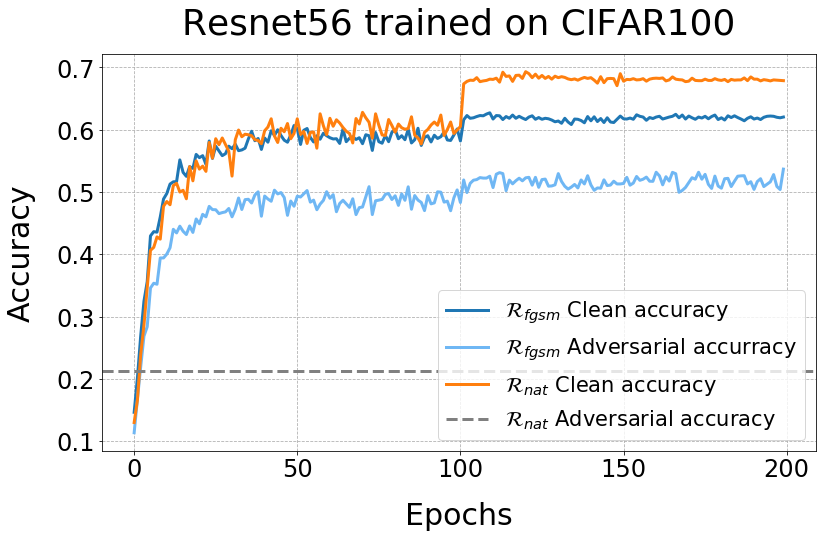

In [14]:
# net='transfer_resnet56_pgd_pgd'
scale=1.5
s=100*scale
ll=3
plt.rcParams.update({'font.size': 16*scale})
fig=plt.figure(figsize=(12,8))

baseline = 'resnet56_cifar100_fgsm'
# plt.subplot(1,2,1)
# clean_val_acc_summary[net].plot(label = 'nat_pgd clean_val_acc')
# adv_val_acc_summary[net].plot(label = 'nat_pgd adv_acc')
clean_val_acc_summary[baseline].plot(label = '$\mathcal{R}_{fgsm}$ Clean accuracy', linewidth=ll)
adv_val_acc_summary[baseline].plot(label = '$\mathcal{R}_{fgsm}$ Adversarial accurracy', linewidth=ll, color=['#6fb7f4'])
# plt.subplot(1,2,2)
# net='transfer_resnet56_nat_fgsm'
nat = 'resnet56_cifar100'

# clean_val_acc_summary[net].plot(label = 'nat_pgd clean_val_acc')
# adv_val_acc_summary[net].plot(label = 'nat_pgd adv_acc')

validation_summary[nat][:200].plot(label = '$\mathcal{R}_{nat}$ Clean accuracy', linewidth=ll)
# adv_val_acc_summary[baseline].plot(label = 'baseline adversarial accurracy', )
# # adv_train_acc_summary[net].plot(label = 'adversarial train_acc')
# # clean_train_acc_summary[net].plot(label = 'clean_train_acc')
# # adv_train_acc_summary[net] = data_train['adv_train_acc']
# #     clean_train_acc_summary[net]

plt.axhline(0.213,label='$\mathcal{R}_{nat}$ Adversarial accuracy',color='gray',linestyle='--', linewidth=ll)

plt.xlabel('Epochs',fontdict={'size':20*scale}, labelpad=20)
plt.ylabel('Accuracy',fontdict={'size':20*scale}, labelpad=20)
plt.title('Resnet56 trained on CIFAR100',fontdict={'size':24*scale}, pad=20)
ax = plt.gca()
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
plt.xticks([0, 50, 100, 150, 200])
plt.legend(loc=4, fontsize=14*scale)
plt.tight_layout()

fig.savefig('images/resnet56_cifar100.pdf')

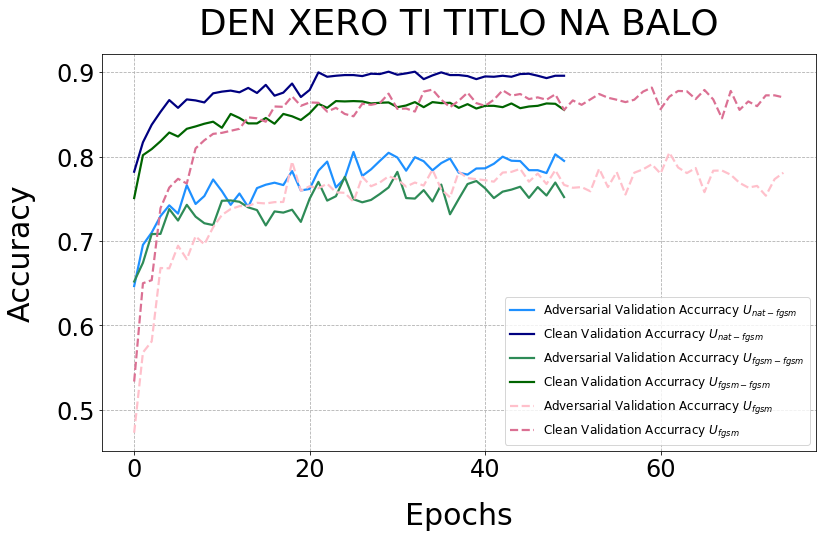

In [7]:
scale=1.5
s=100*scale
ll=2.2
plt.rcParams.update({'font.size': 16*scale})
fig=plt.figure(figsize=(12,8))

baseline = 'resnet56_cifar10_fgsm'
net='transfer_resnet56_nat_fgsm'
plt.title('Transfering Densenet 121',fontsize=16)
adv_val_acc_summary[net].plot(label = 'Adversarial Validation Accurracy $U_{nat-fgsm}$', color='dodgerblue', linewidth=ll)
clean_val_acc_summary[net].plot(label = 'Clean Validation Accurracy $U_{nat-fgsm}$', color='navy', linewidth=ll)


net='transfer_resnet56_fgsm_fgsm'

adv_val_acc_summary[net].plot(label = 'Adversarial Validation Accurracy $U_{fgsm-fgsm}$', color='seagreen', linewidth=ll)
clean_val_acc_summary[net].plot(label = 'Clean Validation Accurracy $U_{fgsm-fgsm}$', color='darkgreen', linewidth=ll)

adv_val_acc_summary[baseline][:75].plot(label = 'Adversarial Validation Accurracy $U_{fgsm}$',color = 'pink',linestyle='dashed', linewidth=ll)
clean_val_acc_summary[baseline][:75].plot(label = 'Clean Validation Accurracy $U_{fgsm}$',color='palevioletred',linestyle='dashed', linewidth=ll)

plt.legend(fontsize=10*scale)
plt.xlabel('Epochs',fontdict={'size':20*scale}, labelpad=20)
plt.ylabel('Accuracy',fontdict={'size':20*scale}, labelpad=20)
plt.title('DEN XERO TI TITLO NA BALO',fontdict={'size':24*scale}, pad=20)
ax = plt.gca()
ax.yaxis.grid(True, linestyle='--')
ax.xaxis.grid(True, linestyle='--')
plt.xticks([0, 20, 40, 60])
plt.legend(loc=4, fontsize=8*scale)
plt.tight_layout()
plt.savefig('images/TransferLearning.pdf')


plt.show()

In [86]:
import json 
clean_models = {}

nets = {
        'resnet56_cifar10': 'cifar10',
#         'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
#         'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
#         'transfer_densenet121_nat_fgsm' : 'cifar10',
#         'transfer_densenet121_fgsm_fgsm' : 'cifar10',
        
        'transfer_densenet121_nat_nat':'cifar10', 
#         'transfer_densenet121_nat_nat_all_layers': 'cifar10',
#         'transfer_resnet56_fgsm_fgsm': 'cifar10',
#         'transfer_resnet56_nat_fgsm': 'cifar10',
#           'transfer_densenet121_fgsm_fgsm': 'cifar10',
#           'transfer_densenet121_fgsm_nat': 'cifar10',
#           'transfer_resnet56_fgsm_nat': 'cifar10',
    
        'transfer_resnet56_nat_nat': 'cifar10',
#         'transfer_resnet56_nat_nat_all_layers': 'cifar10',
}



 
clean_train_summary = {}
clean_validation_summary = {}
clean_test_summary = {}


for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    splited = net.split('_')
#     print(splited)
    if splited[0] == 'transfer':
        architecture = splited[1]
    else:
        architecture = splited[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    clean_models[net] = load_network  


for net,dataset in clean_models.items():
    
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    clean_data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    
    clean_validation_summary[net] = clean_data_train['val_acc']    
    clean_train_summary[net] = clean_data_train['train_acc']
    
# net='transfer_densenet121_fgsm_fgsm'

# adv_val_acc_summary[net].plot(label = 'adv_val_acc')
# clean_val_acc_summary[net].plot(label = 'clean_val_acc')

# adv_val_acc_summary[baseline].plot(label = 'adv_val_acc')
# clean_val_acc_summary[baseline].plot(label = 'clean_val_acc')
# plt.xlabel('epochs')
# plt.ylabel('Accuracy')

In [84]:
# ##### plt.figure(figsize=(10,10))
# train_summary['transfer_resnet56_fgsm_fgsm'].plot(label = 'clean_train_acc fgsm_fgsm')
# train_summary['transfer_resnet56_nat_fgsm'].plot(label = 'clean_train_acc nat_fgsm')
# validation_summary['transfer_resnet56_fgsm_fgsm'].plot(label = 'adv_val_acc nat_fgsm')
# validation_summary['transfer_resnet56_nat_fgsm'].plot(label = 'adv_val_acc nat_fgsm')
# plt.legend()
# print(np.max(validation_summary['resnet56_cifar10_fgsm'][:50]))
# print(np.max(validation_summary['transfer_resnet56_fgsm_fgsm'][:50]))


In [186]:
import json 
clean_models = {}

nets = {
        'resnet56_cifar10': 'cifar10',
#         'resnet56_cifar10_fgsm': 'cifar10',
#         'resnet56_cifar10_pgd': 'cifar10',
#         'resnet56_cifar100': 'cifar100',
#         'resnet56_cifar100_fgsm': 'cifar100',
#         'resnet56_cifar100_pgd': 'cifar100',
#         'resnet56_cifar100_to_cifar10': 'cifar10',

#         'densenet121_cifar10': 'cifar10',
#         'densenet121_cifar10_fgsm': 'cifar10',
#         'densenet121_cifar10_pgd': 'cifar10',
#         'densenet121_cifar100': 'cifar100',
#         'densenet121_cifar100_fgsm': 'cifar100',
#         'densenet121_cifar100_pgd': 'cifar100'
#         'transfer_densenet121_nat_fgsm' : 'cifar10',
#         'transfer_densenet121_fgsm_fgsm' : 'cifar10',
        
        'transfer_densenet121_nat_nat':'cifar10', 
#         'transfer_densenet121_nat_nat_all_layers': 'cifar10',
#         'transfer_resnet56_fgsm_fgsm': 'cifar10',
#         'transfer_resnet56_nat_fgsm': 'cifar10',
#           'transfer_densenet121_fgsm_fgsm': 'cifar10',
#           'transfer_densenet121_fgsm_nat': 'cifar10',
#           'transfer_resnet56_fgsm_nat': 'cifar10',
    
        'transfer_resnet56_nat_nat': 'cifar10',
#         'transfer_resnet56_nat_nat_all_layers': 'cifar10',
}

 
clean_train_summary = {}
clean_validation_summary = {}
clean_test_summary = {}


for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    splited = net.split('_')
#     print(splited)
    if splited[0] == 'transfer':
        architecture = splited[1]
    else:
        architecture = splited[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    clean_models[net] = load_network  


for net,dataset in clean_models.items():
    
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    clean_data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    
    clean_validation_summary[net] = clean_data_train['val_acc']    
    clean_train_summary[net] = clean_data_train['train_acc']
    
    

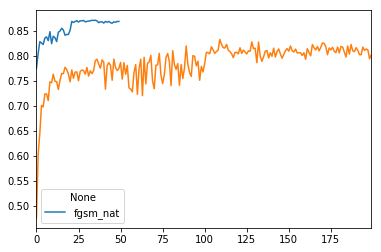

In [200]:
clean_validation_summary['transfer_densenet121_fgsm_nat'].plot(label = 'fgsm_nat')
# adv_val_acc_summary['transfer_densenet121_fgsm_nat'].plot(label = 'nat fgsm')
plt.legend()
adv_val_acc_summary['densenet121_cifar10_fgsm'].plot(label = 'clean_train_acc fgsm_fgsm')

In [ ]:
import json 
clean_models = {}

nets = {
        'resnet56_cifar10': 'cifar10',
        'resnet56_cifar10_fgsm': 'cifar10',
        'resnet56_cifar10_pgd': 'cifar10',
        'resnet56_cifar100': 'cifar100',
        'resnet56_cifar100_fgsm': 'cifar100',
        'resnet56_cifar100_pgd': 'cifar100',


        'densenet121_cifar10': 'cifar10',
        'densenet121_cifar10_fgsm': 'cifar10',
        'densenet121_cifar10_pgd': 'cifar10',
        'densenet121_cifar100': 'cifar100',
        'densenet121_cifar100_fgsm': 'cifar100',
        'densenet121_cifar100_pgd': 'cifar100',
    
        'transfer_densenet121_nat_fgsm' : 'cifar10',
        'transfer_densenet121_fgsm_fgsm' : 'cifar10',
        'transfer_densenet121_fgsm_nat': 'cifar10',
        'transfer_densenet121_nat_nat':'cifar10',
    
        'transfer_resnet56_fgsm_fgsm': 'cifar10',
        'transfer_resnet56_nat_fgsm': 'cifar10',
        'transfer_resnet56_fgsm_nat': 'cifar10',
        'transfer_resnet56_nat_nat': 'cifar10',
}

 
clean_train_summary = {}
clean_validation_summary = {}
clean_test_summary = {}


for net,dataset in nets.items():
    model_path = '../experiments_results/'+net+'/saved_models/train_model_best_readable'
    model_dict = torch.load(model_path, map_location='cpu')
    splited = net.split('_')
#     print(splited)
    if splited[0] == 'transfer':
        architecture = splited[1]
    else:
        architecture = splited[0]
    load_network = load_net(architecture, model_path, 10) if dataset == 'cifar10' else  load_net(architecture, model_path, 100)
    clean_models[net] = load_network  


for net,dataset in clean_models.items():
    
    stats_path =  '../experiments_results/'+net+'/result_outputs'
    clean_data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    
#     data_test  = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
#     test_summary[net] = data_test['test_acc']
    
    clean_validation_summary[net] = clean_data_train['val_acc']    
    clean_train_summary[net] = clean_data_train['train_acc']
    